In [144]:
import pandas as pd

from route_66.visualisation import plot_simulation, plot_batch_run

# Simulational Analysis
Jupyter Notebook for the assignment 'Touring Machines' for the course Simulation Tooling for the bachelor programme Artificial Intelligence at the HU University of Applied Sciences Utrecht

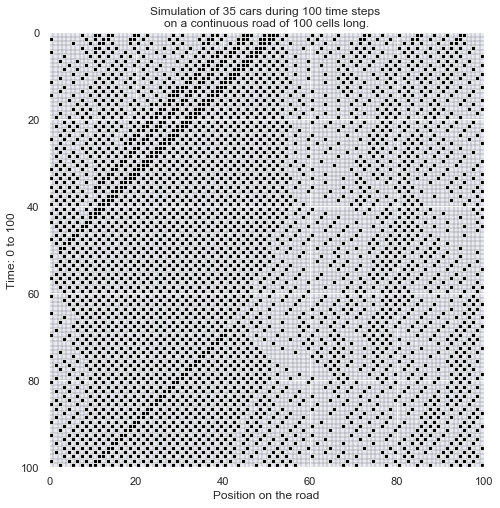

In [145]:
plot_simulation(100, 35, length=100, p=0.3, grid=True)

## Analysis
### Plot
Plot containing boxplots visualising the effects of timer length and initial number of cars on average velocity:

360it [00:20, 17.69it/s]


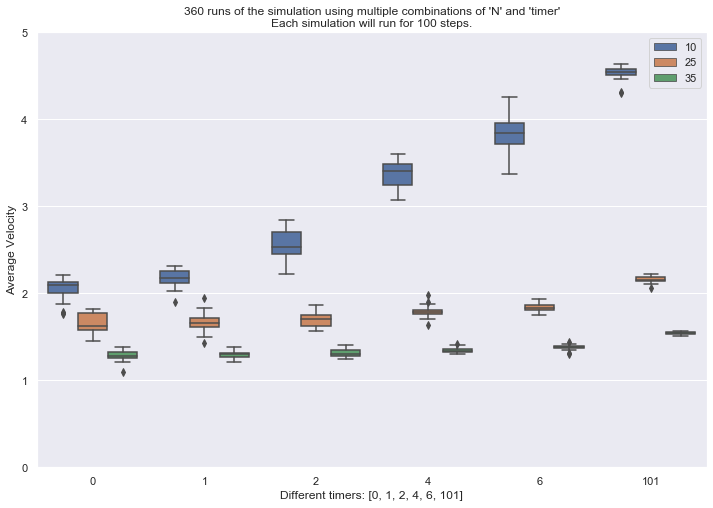

In [146]:
data = plot_batch_run(N=[10, 25, 35], timer=[0, 1, 2, 4, 6, 101], iterations=20)

### Using Pandas


In [147]:
# Drop Run, length and lanes, and group Dataframe by initial cars on road 
N_data = data[["timer", "N", "Average Velocity", "Standard Deviation"]].groupby("N")

# For each group, split from dataframe, group by timer, find mean for velocity and STD, sort by Average velocity
timer_data = [N_data.get_group(x).groupby("timer").mean().sort_values("Average Velocity", ascending=False) for x in N_data.groups]
print(timer_data[0])

        N  Average Velocity  Standard Deviation
timer                                          
101    10          4.526450            0.729759
6      10          3.828105            1.311157
4      10          3.370009            1.538465
2      10          2.558668            1.723551
1      10          2.175617            1.667048
0      10          2.041488            1.643115


In [148]:
mean_data = pd.concat(timer_data)
mean_data

,N,Average Velocity,Standard Deviation
timer,,,
101,10,4.526450,0.729759
6,10,3.828105,1.311157
4,10,3.370009,1.538465
2,10,2.558668,1.723551
1,10,2.175617,1.667048
0,10,2.041488,1.643115
101,25,2.161160,1.294783
6,25,1.832933,1.267285
4,25,1.790147,1.274367


For each variation of N, the timer with a length of 6 grants the greatest average average velocity. It usually also grants a lower or the lowest average standard deviation for its N.   

The greater the amount of initial cars, the lesser the impact of timer length. 


## t-test
The t-test compares two means (averages) and tells the user if they are different from each other.
Furthermore the t-test also tells how significant the differences are.  
It lets you know if those differences could have happened by chance.  
  
The t-score is a ratio between the difference between two groups and the difference within the groups.
The larger the t-score, the more difference there is between the two groups.
Oppositely; the smaller the t-score, the more similarity there is between groups.  
  
Every t-value has a p-value to go with it.
A p-value is the probability that the results from your sample data occurred by chance.
Low p-values are good; They indicate that your data did not occur by chance.

In [149]:
import scipy.stats as sc
import pprint as pp

test_data = data
test_data = test_data[["N", "timer", "Average Velocity", "Standard Deviation"]].groupby('N')

result = []

for table in test_data:
    h_0 = table[1]['Average Velocity'][table[1]['timer'] == 101]
    
    for interval in table[1]['timer'].unique()[:-1]:
        h_1 = table[1]['Average Velocity'][table[1]['timer'] == interval]
        t_test = sc.ttest_ind(h_0, h_1, axis=0, equal_var=False)
        result.append([table[0], 101, interval, t_test[0], t_test[1]])

df_result = pd.DataFrame(result, columns = ['N', 'base', 'interval', 't-value', 'p-value'])
df_result     

,N,base,interval,t-value,p-value
0,10,101,0,67.968291,5.663916e-36
1,10,101,1,76.960843,5.314731e-42
2,10,101,2,49.903685,2.429973e-30
3,10,101,4,27.965674,1.971777e-22
4,10,101,6,14.564114,4.868557e-14
5,25,101,0,18.324937,8.878057e-16
6,25,101,1,18.408489,6.340172e-16
7,25,101,2,22.250151,9.313515e-20
8,25,101,4,19.386465,7.266902e-19
9,25,101,6,22.940855,8.400377e-24


As can be seen in the created table the t-values between the base and intervals at a low N are significantly higher
than the t-values at higher N's. This means that the differences between the groups at a lower N are greater than the
differences at a higher N and that there is a more significant difference between these two groups.  
Furthermore the p-values are extremely low which means that our sample data has a high probability that it occured by chance.


